In [1]:
import pandas as pd
import numpy as np

In [2]:


df = pd.read_csv('/content/spam.tsv',sep='\t')

In [4]:
df = df[['label','message']]

In [5]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

### **Steps to be Followed:**

- 1. Data cleaning
- 2. EDA
- 3. Text Preprocessing
- 4. Model building
- 5. Evaluation
- 6. Deploy into Stremlit Web APP

### **1. Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# renaming the cols
df.rename(columns={'label':'target','message':'text'},inplace=True)
df.sample(5)

,target,text
988,ham,"Geeee ... I miss you already, you know ? Your ..."
3231,ham,I feel like a dick because I keep sleeping thr...
3702,ham,Shall i get my pouch?
4675,ham,I'm leaving my house now.
5249,ham,"K I'm leaving soon, be there a little after 9"


In [10]:
##Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
##Check for the duplicates
df.duplicated().sum()

403

In [12]:
##Remove the duplicates
df = df.drop_duplicates(keep='first')
#This removes duplicate rows from the DataFrame,
#keeping only the first occurrence of each duplicate row.

In [13]:
##Check for the duplicates
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

### **2.EDA**

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df['target'].value_counts()

#ham : 0
#spam :1

target
0    4516
1     653
Name: count, dtype: int64

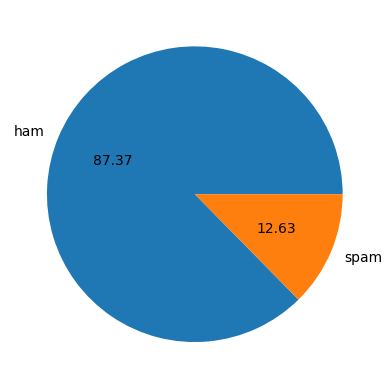

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
##Data is Imbalanced

In [20]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
#length of number of characters
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
ans = nltk.word_tokenize(df['text'][0]) ### it will seperate all the words and punctuations
print(ans)

['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [24]:
## number of words in the text and find it's length
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
## seperate the senteces ,when pullstop is there
ans_1 = nltk.sent_tokenize(df['text'][0])
print(ans_1)

['Go until jurong point, crazy..', 'Available only in bugis n great world la e buffet... Cine there got amore wat...']


In [27]:
#find the numner of seneteces present in the text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
##ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.906333,17.267715,1.827724
std,56.717234,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
##spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: >

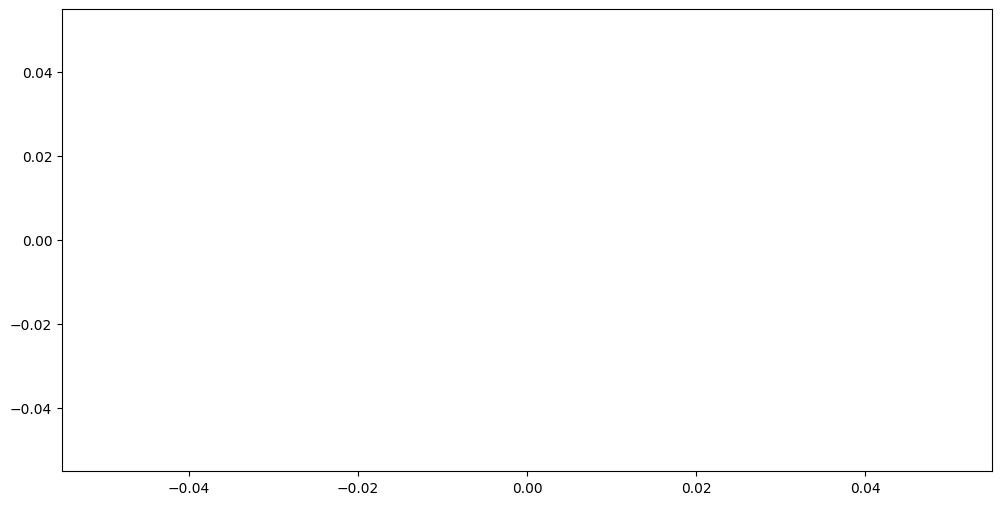

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']=='ham']['num_characters'])
sns.histplot(df[df['target']=='spam']['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

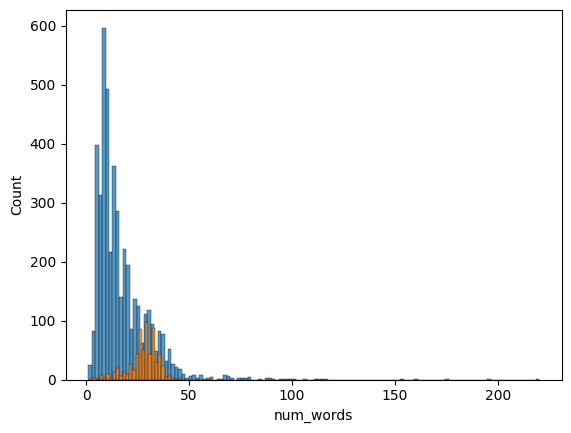

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'])

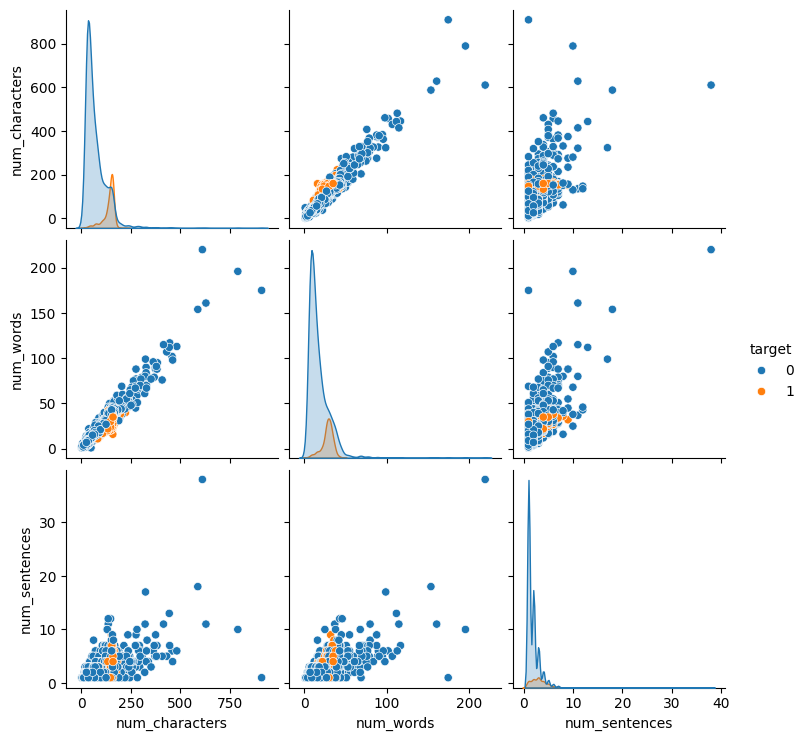

In [35]:
sns.pairplot(df,hue ='target')

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### **3.Data PreProcessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [37]:
#Lower case
#split the all words

def transform_text_1(text):
  text = text.lower()
  text = nltk.word_tokenize(text)#it iwll break the words ,in the sentence by space,punct,p
  return text


In [38]:
print(transform_text_1(df['text'][0]))

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']


In [39]:
print(transform_text_1('Hi How are you? what!s up.'))

['hi', 'how', 'are', 'you', '?', 'what', '!', 's', 'up', '.']


### **text -preprocessing**

In [40]:
#Lower case
#split the all words
#remove the special characters


def transform_text_1(text):
  text = text.lower()
  text = nltk.word_tokenize(text)#it iwll break the words ,in the sentence by space,punct,comma

  y = []
  for i in text:
    if i.isalnum():#if it is alphanum
      y.append(i)

  return y


In [41]:
df['text'][200]

'Found it, ENC  &lt;#&gt; , where you at?'

In [42]:
print(transform_text_1('Hi, How are you? what!s up.'))

['hi', 'how', 'are', 'you', 'what', 's', 'up']


In [43]:
print(transform_text_1(df['text'][200]))

['found', 'it', 'enc', 'lt', 'gt', 'where', 'you', 'at']


In [44]:
import nltk
nltk.download('stopwords')
import string # Import the string module


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [46]:
#Lower case
#split the all words
#remove the special characters
#remove the Stopwords and Punctions


def transform_text_2(text):
  text = text.lower()
  text = nltk.word_tokenize(text)#it iwll break the words ,in the sentence by space,punct,comma

  y = []
  for i in text:
    if i.isalnum():#if it is alphanum
      y.append(i)

  text = y[:] # copy to text
  y.clear() #clear the list

  for i in text :
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  return y


In [47]:
#['found', 'it', 'enc', 'lt', 'gt', 'where', 'you', 'at'] - Previous ttransform_text_1 output
transform_text_2(df['text'][200])

['found', 'enc', 'lt', 'gt']

In [48]:
print(transform_text_2('Hi, How are you? what!s up.'))

['hi']


In [49]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [50]:
#Lower case
#split the all words
#remove the special characters
#remove the Stopwords and Punctions
#apply the stemming

#####################   This is the Main Function #######################
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)#it iwll break the words ,in the sentence by space,punct,comma

  y = []
  for i in text:
    if i.isalnum():#if it is alphanum
      y.append(i)

  text = y[:] # copy to text
  y.clear() #clear the list

  for i in text :
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)


  text = y[:] #copy the text
  y.clear() #clear it

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [51]:
# ['found', 'enc', 'lt', 'gt'] #prev output
transform_text(df['text'][200])

'found enc lt gt'

In [52]:
print(transform_text(""" i am really enjoying the Natural Processing Language Classes and its Implemnataion! It's Amazing """))

realli enjoy natur process languag class implemnataion amaz


In [53]:
df['transformed_text']= df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


**The WordCloud class from the wordcloud library in Python is used to generate word clouds, which are visual representations of text data where the size of each word indicates its frequency or importance in the dataset.**

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

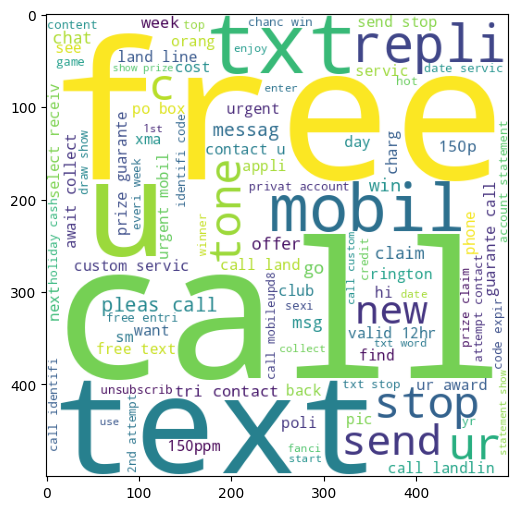

In [57]:

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


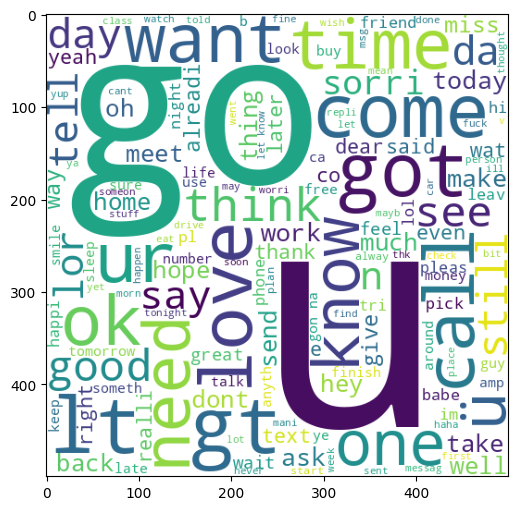

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [62]:
##split all the words and store in the list
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [63]:
len(spam_corpus)


9982

In [64]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

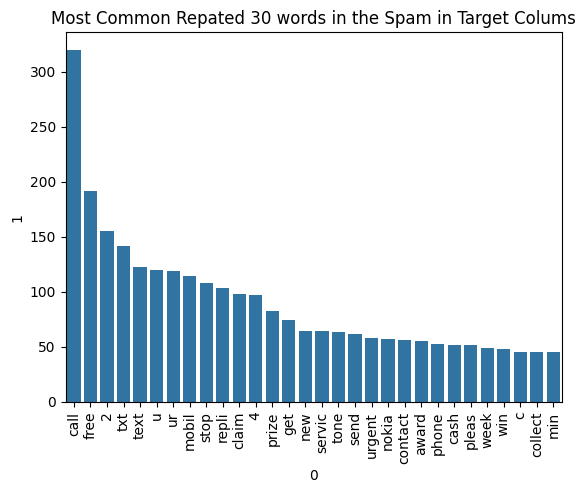

In [65]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most Common Repated 30 words in the Spam in Target Colums")
plt.show()

In [66]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [67]:
len(ham_corpus)

35939

In [68]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 142),
 ('tell', 133)]

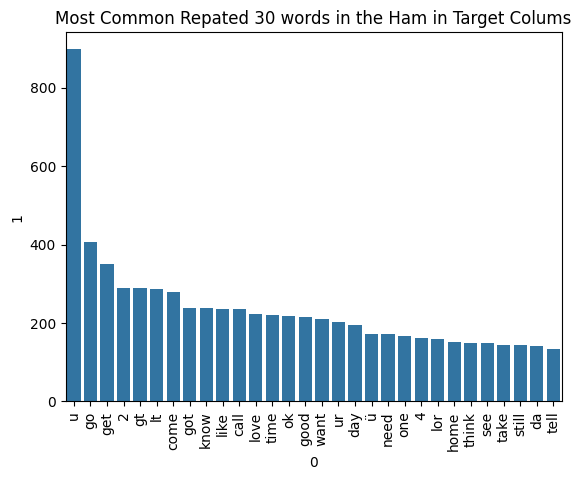

In [69]:
##Now Plot the Most Coomon 30 words of the Ham  in Target column

sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most Common Repated 30 words in the Ham in Target Colums")
plt.show()

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
df.shape

(5169, 6)

### **Model Building**

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
X.shape

(5169, 3000)

In [75]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
y = df['target'].values

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0])

**TRain-Test-Split**

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 2)


In [80]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [81]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred_1 = gnb.predict(X_test)
print("Accuracy Score :-")
print(accuracy_score(y_test,y_pred_1))
print("\nConfusion Matrix:-")
print(confusion_matrix(y_test,y_pred_1))
print("\nPrecision Score:-")
print(precision_score(y_test,y_pred_1))

Accuracy Score :-
0.8617021276595744

Confusion Matrix:-
[[788 120]
 [ 23 103]]

Precision Score:-
0.4618834080717489


In [83]:
mnb.fit(X_train,y_train)
y_pred_2 = mnb.predict(X_test)
print("Accuracy Score :-")
print(accuracy_score(y_test,y_pred_2))
print("\nConfusion Matrix:-")
print(confusion_matrix(y_test,y_pred_2))
print("\nPrecision Score:-")
print(precision_score(y_test,y_pred_2))

Accuracy Score :-
0.9690522243713733

Confusion Matrix:-
[[908   0]
 [ 32  94]]

Precision Score:-
1.0


In [84]:
bnb.fit(X_train,y_train)
y_pred_3 = bnb.predict(X_test)
print("Accuracy Score :-")
print(accuracy_score(y_test,y_pred_3))

print("\nConfusion Matrix:-")
print(confusion_matrix(y_test,y_pred_3))

print("\nPrecision Score:-")
print(precision_score(y_test,y_pred_3))

Accuracy Score :-
0.9748549323017408

Confusion Matrix:-
[[906   2]
 [ 24 102]]

Precision Score:-
0.9807692307692307


In [85]:
## TFidf -> MNB

In [86]:
## USe the all classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier



In [87]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators = 50,random_state =2)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
abc = AdaBoostClassifier(n_estimators = 50,random_state =2)
bc = BaggingClassifier(n_estimators = 50,random_state =2)
gbc = GradientBoostingClassifier(n_estimators = 50,random_state =2)
#etc = ExtraTreesClassifier()
xgb = XGBClassifier(n_estimators = 50,random_state =2)


In [88]:
clfs = {
    'SVC' : svc,
    'KNN':knc,
    'LogisticRegression':lrc,
    'RandomForestClassifier':rfc,
    'MultinomialNB':mnb,
    'DecisionTreeClassifier':dtc,
    'AdaBoostClassifier':abc,
    'BaggingClassifier':bc,
    'GradientBoostingClassifier':gbc,
    'XGBClassifier':xgb


}

In [89]:
def train_classifer(clfs,X_train,y_train,X_test,y_test):
  clfs.fit(X_train,y_train)
  y_pred = clfs.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)


  return accuracy

In [90]:
train_classifer(svc,X_train,y_train,X_test,y_test)

0.9738878143133463

In [91]:
all_accuracy_scores = []




for name,clf in clfs.items():
  current_accuracy = train_classifer(clf,X_train,y_train,X_test,y_test)
  print(name,"Model:- ")
  print("Accuracy :-",current_accuracy)
  all_accuracy_scores.append(current_accuracy)
  print("----"*20)




SVC Model:- 
Accuracy :- 0.9738878143133463
--------------------------------------------------------------------------------
KNN Model:- 
Accuracy :- 0.9187620889748549
--------------------------------------------------------------------------------
LogisticRegression Model:- 
Accuracy :- 0.9535783365570599
--------------------------------------------------------------------------------
RandomForestClassifier Model:- 
Accuracy :- 0.9671179883945842
--------------------------------------------------------------------------------
MultinomialNB Model:- 
Accuracy :- 0.9690522243713733
--------------------------------------------------------------------------------
DecisionTreeClassifier Model:- 
Accuracy :- 0.937137330754352
--------------------------------------------------------------------------------
AdaBoostClassifier Model:- 
Accuracy :- 0.9661508704061895
--------------------------------------------------------------------------------
BaggingClassifier Model:- 
Accuracy :- 0.9671179

In [92]:
df_of_all_scores = pd.DataFrame({'Alogorithm Used':clfs.keys(),'Accuracy':all_accuracy_scores}).sort_values('Accuracy',ascending=False)

In [93]:
df_of_all_scores

,Alogorithm Used,Accuracy
0,SVC,0.973888
4,MultinomialNB,0.969052
3,RandomForestClassifier,0.967118
7,BaggingClassifier,0.967118
6,AdaBoostClassifier,0.966151
9,XGBClassifier,0.965184
2,LogisticRegression,0.953578
8,GradientBoostingClassifier,0.942940
5,DecisionTreeClassifier,0.937137
1,KNN,0.918762


In [94]:
##SVC and Multinomial Naive Bayes give More Accurcy here


#we, use the multinomial Naive Bayes

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

mnb_params = {
    'alpha': [0.5, 1.0, 1.5, 2.0]
}

mnb_grid = GridSearchCV(MultinomialNB(), mnb_params, cv=5, scoring='accuracy', n_jobs=-1)
mnb_grid.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.5, 1.0, 1.5, 2.0]}, scoring='accuracy')

In [96]:
print(f"Best parameters for Multinomial Naive Bayes: {mnb_grid.best_params_}")
print(f"Best cross-validation accuracy for Multinomial Naive Bayes: {mnb_grid.best_score_}")


Best parameters for Multinomial Naive Bayes: {'alpha': 0.5}
Best cross-validation accuracy for Multinomial Naive Bayes: 0.9799274486094316


In [97]:

# Retrain the best model on the entire training data
best_mnb = mnb_grid.best_estimator_

best_mnb


MultinomialNB(alpha=0.5)

In [98]:
best_mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [99]:
import pickle

# Save the model
with open('mnb_model.pkl', 'wb') as model_file:
    pickle.dump(best_mnb, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


In [100]:
# Load the model and TF-IDF vectorizer
with open('mnb_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

In [101]:
##input message

input_message = ["WELL DONE! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TCs, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins"]


##fit the tfidf
input_message = tfidf_vectorizer.transform(input_message)


#predict
prediction = model.predict(input_message)


if prediction[0]==1:
  print("Spam")
else:
  print("Ham")


Spam
